In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Date from yfinance

In the code cell below I create a function called get_data(). The core purpose of this function is to quickly download and process data for the 5 FAANG stocks for the past 5 days.

A problem I ran improper indexing. When I first tried to convert the data to csv format, only two columns were converted. I researched multi indexing so that I could have the 'Close', 'Open', 'Volume' headings as index objects above each of the stocks, to improve readability and also to instuct python to properly convert the data frame into a readable csv file.

multi indexing reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html




In [17]:
# writing a function called get_data() to fetch data from the past 5 days for the FAANG stocks

def get_data():
    current_date_time = pd.Timestamp.now().strftime('%Y%m%d-%H%M%S') #reference: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    file_path = f'C:/Users/fmtie/OneDrive/Desktop/comp-infrastructure/data/{current_date_time}.csv'
    faang_stock_data_past_5_days = yf.download('meta aapl amzn nflx goog', period="5d") # reference: https://ranaroussi.github.io/yfinance/reference/yfinance.ticker_tickers.html
    faang_stock_data_frame = pd.DataFrame(faang_stock_data_past_5_days)
    pd.MultiIndex.from_frame(faang_stock_data_frame)
    faang_stock_data_frame.to_csv(file_path)

    return file_path

# this runs the function, while also storing the file path used which I need for my next function
file_path = get_data()


C:\Users\fmtie\AppData\Local\Temp\ipykernel_8000\3477109469.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  faang_stock_data_past_5_days = yf.download('meta aapl amzn nflx goog', period="5d") # reference: https://ranaroussi.github.io/yfinance/reference/yfinance.ticker_tickers.html
[*********************100%***********************]  5 of 5 completed


## Problem 2 Plotting Data
Below I attempt to begin plotting the data stored in the .csv file I have just created. I refer to Wes McKinney's book 'Python for Data Analysis' chapter 9 to create a figure with 4 sub plots to allow me to create the prescribed close prices plot, as well as other plots I think might be useful.

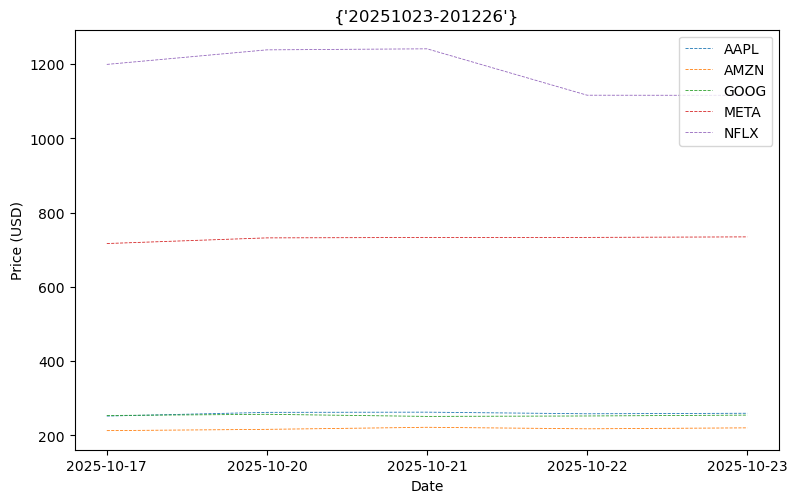

In [18]:
#df = pd.read_csv(file_path, index_col=0, header=[0,1])
#print(df)
#closes = df['Close']
#print(closes.columns)


# reading in the csv file specifying the two header rows (as I initially made this a multi-index dataframe)
# then creating a figure and subplots
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
def plot_data():
    current_date_time = pd.Timestamp.now().strftime('%Y%m%d-%H%M%S') #reference: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    df = pd.read_csv(file_path, index_col=0, header=[0,1])
    closes = df['Close']
    tickers = closes.columns
    fig = plt.figure(figsize=(20, 12))
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.set_title({current_date_time})
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)')
    ax1.plot(closes[tickers], lw=0.6, ls='--')
    ax1.legend(tickers)

plot_data()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
# As per documentation, if format argument is not set, it is inferred from file extension (.png)
plt.savefig(r'C:\Users\fmtie\OneDrive\Desktop\comp-infrastructure\plots\{current_date_time}.png')


Making script runnable from cmder

link to copilot conversation: https://copilot.microsoft.com/shares/SXeejgA1NPiz9vFGgNf5h

I wrote my script in vs code on my computer, and I push changes to github using cmder, so I wanted to find a way that I could make my faang.py file executable from cmder.

I followed the steps outlined in the above referenced copilot conversation.

I have added a shebang line to the faang.py script, and added the folder in which the faang.py script sits directly to my system's path, so that I can type 'faang.py' directly into the GitBash terminal on my computer to run it, but I am getting the below error at present:

bash: /c/Users/fmtie/OneDrive/Desktop/comp-infrastructure/faang.py: cannot execute: required file not found
